# Testing Notebook

### Import libraries

In [120]:
import sys
import os

# Manually specify the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the specified path to the system path
sys.path.append(src_path)

# Third-party libraries
import networkx as nx
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2, FakeBrooklynV2
import mapomatic as mm

# Local application/library imports
import circuit_gen as circuitGen
import max_clique as maxClique
import qubit_mapping as qMap

### Parameters Configuration

In [121]:
num_modules       = 4
module_max_qubits = 4
module_max_gates  = 6
buffer_distance   = 1

### Random Circuit Generation and Mapping Computation

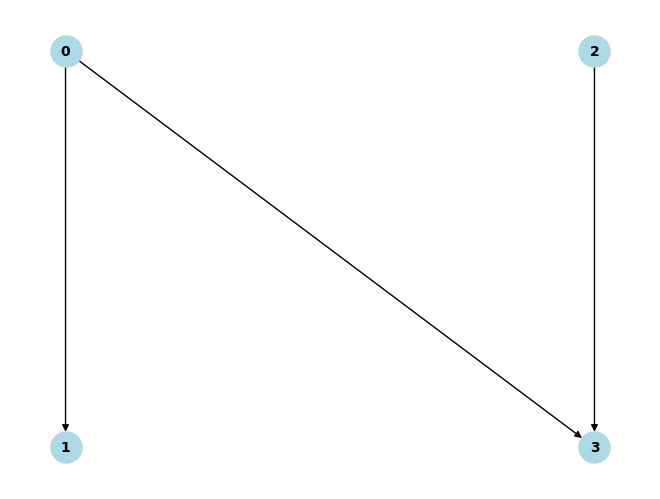

In [122]:
# Generate random circuit
circuit = circuitGen.RandomCircuit(num_modules, module_max_qubits, module_max_gates)
circuit.gen_random_circuit()

# Ploy dependency graph
circuit.draw_dependency_graph()

In [123]:
# Generate the Quantum Circuit Mapping
q_map = qMap.QubitMapping(circuit, backend=FakeGuadalupeV2(), buffer_distance=buffer_distance)
q_map.generate_qubit_mapping()

In [124]:
print(q_map.qubit_mapping)

[[[28, 29, 30, 24], [39, 43, 44, 45]], [[15, 24, 29, 28], [50, 49, 48, 47]]]


[[28, 29, 30, 24], [39, 43, 44, 45]]
0
1
10
2
3
4
5
11
6
7
8
9
12
13
17
21
14
15
16
24
18
19
20
25
22
23
26
29
33
37
27
28
38
30
31
32
39
34
35
36
40
41
45
49
42
43
44
52
46
47
48
53
50
51
54
56
60
64
55
57
58
59
61
62
63
['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


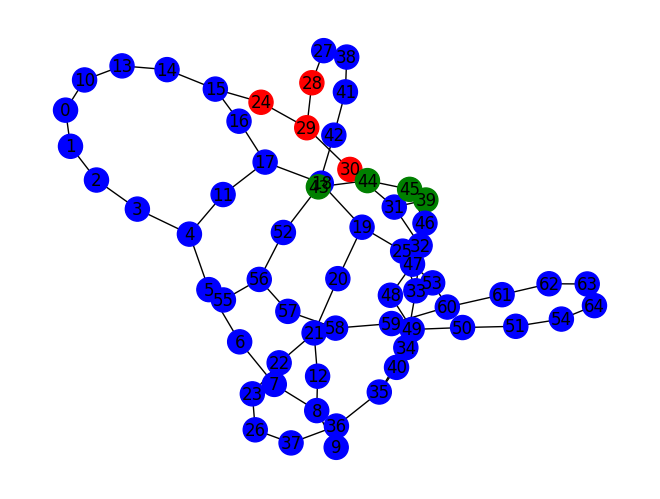

In [130]:
def generate_layouts(module, backend):
    """ Searches for, optimizes and evaluates quantum circuit layouts for a specified backend. """    
    trans_qc = transpile(module, backend, optimization_level=3)
    small_qc = mm.deflate_circuit(trans_qc)
    layouts = mm.matching_layouts(small_qc, backend)
    scores = mm.evaluate_layouts(small_qc, layouts, backend)
    return scores

backend   = q_map.backend
couplings = backend.coupling_map.get_edges()
qc_graph  = nx.from_edgelist(couplings)

# Retrieve the qubits associated with each chosen layout
timestep       = 0
chosen_layouts = q_map.qubit_mapping[timestep]
# for vertex in q_map.qubit_mapping[timestep]:
#     layouts = generate_layouts(q_map.modules[vertex[0]], backend)
#     chosen_layouts.append(layouts[vertex[1]])
# print(f"Qubit associated with each layout: {chosen_layouts}")

print(chosen_layouts)

# Plot the quantum circuit graph with the chosen layout for each mapped module
colors    = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink']
color_map = []

for node in qc_graph:
    print(node)
    in_layout = False
    for layoutIndex, layout in enumerate(chosen_layouts):
        if node in layout:
            color_map.append(colors[layoutIndex + 1])
            in_layout = True
            

    if not in_layout:
        color_map.append(colors[0])
        
print(color_map)
nx.draw(qc_graph, node_color=color_map, with_labels=True)

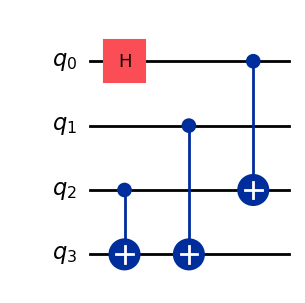

In [126]:
# Plot module of the circuit
circuit.modules[3].draw('mpl')

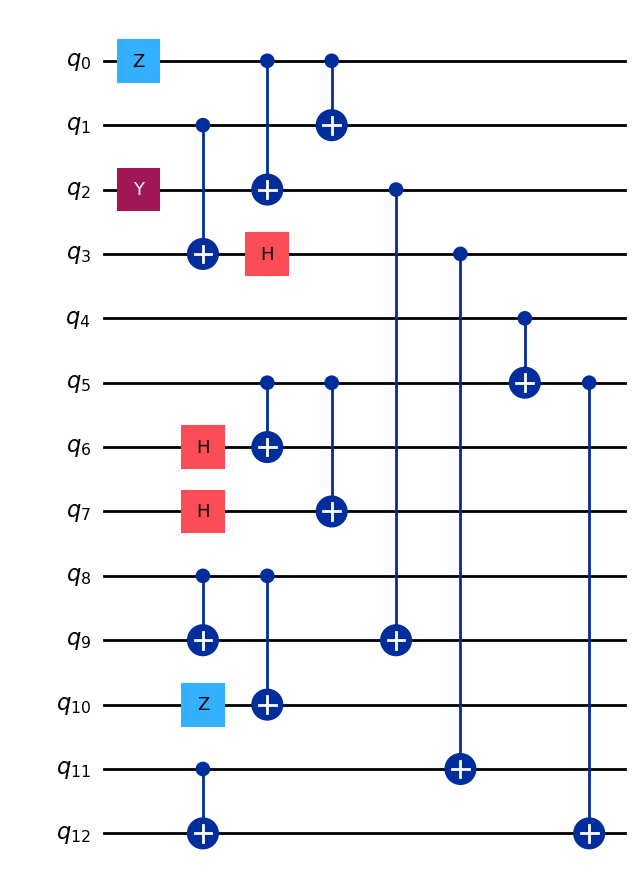

In [127]:
# Plot complete circuit
circuit.get_circuit().draw('mpl')